<h1>Work</h1>

請將 Epoch 加到 500 個，並觀察 learning curve 的走勢

請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model
model = build_mlp()

In [5]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
Compile 模型
"""
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='sgd')

In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 4s 75us/step - loss: 2.0556 - accuracy: 0.2651 - val_loss: 1.9398 - val_accuracy: 0.3004
Epoch 2/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.8807 - accuracy: 0.3366 - val_loss: 1.8562 - val_accuracy: 0.3346
Epoch 3/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.8077 - accuracy: 0.3641 - val_loss: 1.8027 - val_accuracy: 0.3695
Epoch 4/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.7619 - accuracy: 0.3783 - val_loss: 1.7635 - val_accuracy: 0.3735
Epoch 5/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.7218 - accuracy: 0.3915 - val_loss: 1.7272 - val_accuracy: 0.3895
Epoch 6/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.6938 - accuracy: 0.4029 - val_loss: 1.7158 - val_accuracy: 0.3879
Epoch 7/500
50000/50000 [==============================] - 3s

50000/50000 [==============================] - 4s 71us/step - loss: 1.2047 - accuracy: 0.5784 - val_loss: 1.5077 - val_accuracy: 0.4688
Epoch 55/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.1931 - accuracy: 0.5830 - val_loss: 1.3950 - val_accuracy: 0.5066
Epoch 56/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.1843 - accuracy: 0.5846 - val_loss: 1.4044 - val_accuracy: 0.4998
Epoch 57/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.1854 - accuracy: 0.5846 - val_loss: 1.3679 - val_accuracy: 0.5142
Epoch 58/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.1741 - accuracy: 0.5885 - val_loss: 1.3834 - val_accuracy: 0.5089
Epoch 59/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.1659 - accuracy: 0.5923 - val_loss: 1.4004 - val_accuracy: 0.5058
Epoch 60/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.1621 - accuracy: 0.5950 - val_loss: 

50000/50000 [==============================] - 4s 71us/step - loss: 0.9031 - accuracy: 0.6864 - val_loss: 1.5735 - val_accuracy: 0.4785
Epoch 110/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.8970 - accuracy: 0.6878 - val_loss: 1.4007 - val_accuracy: 0.5224
Epoch 111/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.8808 - accuracy: 0.6932 - val_loss: 1.5167 - val_accuracy: 0.4959
Epoch 112/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.8745 - accuracy: 0.6954 - val_loss: 1.5703 - val_accuracy: 0.4924
Epoch 113/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.8765 - accuracy: 0.6936 - val_loss: 1.4350 - val_accuracy: 0.5174
Epoch 114/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.8739 - accuracy: 0.6986 - val_loss: 1.5264 - val_accuracy: 0.4914
Epoch 115/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.8591 - accuracy: 0.7019 - val_

Epoch 164/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.6223 - accuracy: 0.7855 - val_loss: 2.1137 - val_accuracy: 0.4591
Epoch 165/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.6181 - accuracy: 0.7899 - val_loss: 1.6361 - val_accuracy: 0.5157
Epoch 166/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.6184 - accuracy: 0.7895 - val_loss: 1.4741 - val_accuracy: 0.5439
Epoch 167/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.5885 - accuracy: 0.7983 - val_loss: 1.4911 - val_accuracy: 0.5432
Epoch 168/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.5996 - accuracy: 0.7944 - val_loss: 1.5625 - val_accuracy: 0.5281
Epoch 169/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.5995 - accuracy: 0.7960 - val_loss: 1.6409 - val_accuracy: 0.5039
Epoch 170/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.5810 - accuracy:

50000/50000 [==============================] - 4s 74us/step - loss: 0.3845 - accuracy: 0.8749 - val_loss: 1.9492 - val_accuracy: 0.5124
Epoch 219/500
50000/50000 [==============================] - 4s 81us/step - loss: 0.3728 - accuracy: 0.8788 - val_loss: 1.8624 - val_accuracy: 0.5270
Epoch 220/500
50000/50000 [==============================] - 4s 84us/step - loss: 0.3650 - accuracy: 0.8828 - val_loss: 1.8817 - val_accuracy: 0.5037
Epoch 221/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.3567 - accuracy: 0.8846 - val_loss: 2.1725 - val_accuracy: 0.4856
Epoch 222/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.3691 - accuracy: 0.8792 - val_loss: 1.8232 - val_accuracy: 0.5218
Epoch 223/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.3455 - accuracy: 0.8876 - val_loss: 2.4214 - val_accuracy: 0.4877
Epoch 224/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.3644 - accuracy: 0.8841 - val_

50000/50000 [==============================] - 4s 84us/step - loss: 0.1874 - accuracy: 0.9472 - val_loss: 2.1100 - val_accuracy: 0.5392
Epoch 273/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.2063 - accuracy: 0.9443 - val_loss: 2.2770 - val_accuracy: 0.5221
Epoch 274/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.1644 - accuracy: 0.9574 - val_loss: 2.2357 - val_accuracy: 0.5239
Epoch 275/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.2699 - accuracy: 0.9307 - val_loss: 2.0798 - val_accuracy: 0.5429
Epoch 276/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.1717 - accuracy: 0.9545 - val_loss: 2.5134 - val_accuracy: 0.4957
Epoch 277/500
50000/50000 [==============================] - 4s 78us/step - loss: 0.2954 - accuracy: 0.9207 - val_loss: 2.1134 - val_accuracy: 0.5433
Epoch 278/500
50000/50000 [==============================] - 4s 74us/step - loss: 0.1516 - accuracy: 0.9622 - val_

Epoch 327/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.0675 - accuracy: 0.9897 - val_loss: 2.4656 - val_accuracy: 0.5212
Epoch 328/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.0623 - accuracy: 0.9910 - val_loss: 2.5072 - val_accuracy: 0.5371
Epoch 329/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.0601 - accuracy: 0.9908 - val_loss: 2.3745 - val_accuracy: 0.5434
Epoch 330/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.1747 - accuracy: 0.9606 - val_loss: 2.4873 - val_accuracy: 0.5296
Epoch 331/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.1308 - accuracy: 0.9684 - val_loss: 2.4128 - val_accuracy: 0.5281
Epoch 332/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.0570 - accuracy: 0.9923 - val_loss: 2.5006 - val_accuracy: 0.5294
Epoch 333/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.0556 - accuracy:

50000/50000 [==============================] - 4s 81us/step - loss: 0.1216 - accuracy: 0.9759 - val_loss: 2.6274 - val_accuracy: 0.5389
Epoch 382/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.0346 - accuracy: 0.9975 - val_loss: 2.6218 - val_accuracy: 0.5413
Epoch 383/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.0325 - accuracy: 0.9978 - val_loss: 2.6387 - val_accuracy: 0.5390
Epoch 384/500
50000/50000 [==============================] - 4s 74us/step - loss: 0.0308 - accuracy: 0.9978 - val_loss: 2.6939 - val_accuracy: 0.5403
Epoch 385/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.0296 - accuracy: 0.9979 - val_loss: 2.6500 - val_accuracy: 0.5414
Epoch 386/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.0297 - accuracy: 0.9979 - val_loss: 2.6720 - val_accuracy: 0.5455
Epoch 387/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.0284 - accuracy: 0.9980 - val_

Epoch 436/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.0110 - accuracy: 0.9999 - val_loss: 2.9960 - val_accuracy: 0.5420
Epoch 437/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.0111 - accuracy: 0.9997 - val_loss: 3.0128 - val_accuracy: 0.5445
Epoch 438/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.0108 - accuracy: 0.9998 - val_loss: 3.0013 - val_accuracy: 0.5456
Epoch 439/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.0106 - accuracy: 0.9998 - val_loss: 3.0241 - val_accuracy: 0.5444
Epoch 440/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.0107 - accuracy: 0.9998 - val_loss: 3.0230 - val_accuracy: 0.5436
Epoch 441/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.0105 - accuracy: 0.9998 - val_loss: 3.0188 - val_accuracy: 0.5466
Epoch 442/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.0103 - accuracy:

50000/50000 [==============================] - 4s 72us/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 3.2196 - val_accuracy: 0.5443
Epoch 491/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 3.2271 - val_accuracy: 0.5444
Epoch 492/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 3.2317 - val_accuracy: 0.5443
Epoch 493/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 3.2393 - val_accuracy: 0.5451
Epoch 494/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 3.2526 - val_accuracy: 0.5419
Epoch 495/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 3.2413 - val_accuracy: 0.5456
Epoch 496/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.0061 - accuracy: 1.0000 - val_

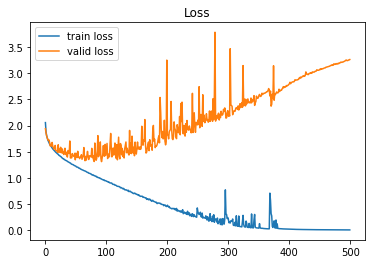

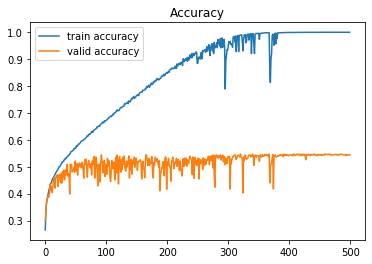

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()